# __Predicting the price of AirBnB__ 
 

In [ ]:
# Packages 
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings(action='ignore')

# Visualization Packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo
import plotly.figure_factory as ff
pyo.init_notebook_mode(connected=True)

import folium   
from folium.plugins import HeatMap

import missingno as msno

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## __1. Data Cleaning__
* How to define outliers that are considered as errors? 
  * ex) price per night > 10,000 USD
* What new variables can we add? (from other datasets?)

In [ ]:
# Import Dataset
# MB
# airbnb_df = pd.read_csv('/content/AB_US_2020.csv', usecols=['id','name','host_id','host_name','neighbourhood_group','neighbourhood','latitude','longitude','room_type','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365','city'])

# AV
airbnb_df = pd.read_csv('/content/drive/My Drive/Documents Ordi/DS4A Women/Project/AB_US_2020.csv', usecols=['id','name','host_id','host_name','neighbourhood_group','neighbourhood','latitude','longitude','room_type','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365','city'])

# QY
# airbnb_df = pd.read_csv('/content/drive/MyDrive/notebook//AB_US_2020.csv', usecols=['id','name','host_id','host_name','neighbourhood_group','neighbourhood','latitude','longitude','room_type','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365','city'])

# YJ 
# airbnb_df = pd.read_csv('/content/drive/MyDrive/AB_US_2020.csv', usecols=['id','name','host_id','host_name','neighbourhood_group','neighbourhood','latitude','longitude','room_type','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365','city'])
airbnb_df.head(5) 

id                                               name  host_id  \
0   38585    Charming Victorian home - twin beds + breakfast   165529   
1   80905                                   French Chic Loft   427027   
2  108061  Walk to stores/parks/downtown. Fenced yard/Pet...   320564   
3  155305                 Cottage! BonPaul + Sharky's Hostel   746673   
4  160594                                Historic Grove Park   769252   

   host_name neighbourhood_group neighbourhood  latitude  longitude  \
0    Evelyne                 NaN         28804  35.65146  -82.62792   
1    Celeste                 NaN         28801  35.59779  -82.55540   
2       Lisa                 NaN         28801  35.60670  -82.55563   
3    BonPaul                 NaN         28806  35.57864  -82.59578   
4  Elizabeth                 NaN         28801  35.61442  -82.54127   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room     60               1                138    16/02/20   
1  Entire home/apt    470               1                114    07/09/20   
2  Entire home/apt     75              30                 89    30/11/19   
3  Entire home/apt     90               1                267    22/09/20   
4     Private room    125              30                 58    19/10/15   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               1.14                               1                 0   
1               1.03                              11               288   
2               0.81                               2               298   
3               2.39                               5                 0   
4               0.52                               1                 0   

        city  
0  Asheville  
1  Asheville  
2  Asheville  
3  Asheville  
4  Asheville

In [ ]:
airbnb_df.shape

(226030, 17)

The dataframe has 17 variables and 226030 rows.

In [ ]:
# Log transformation for price; drop observations with a price of 0 below [QY]
airbnb_df['log_price'] = np.log(airbnb_df['price'])

In [ ]:
#data information
numeric_features = airbnb_df.select_dtypes(include=['int64','float64', 'object']).columns
nominal_features = airbnb_df.select_dtypes(include=['object'])

# As we will only display 8 graphs below in the EDA section, I think it would be more interesting to look at availability_365 than host_id. 
# So I deleted the first two features. [QY] 

#numeric_features=numeric_features.delete(0)
numeric_features=numeric_features.delete([0,1])

airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              226030 non-null  int64  
 1   name                            226002 non-null  object 
 2   host_id                         226030 non-null  int64  
 3   host_name                       225997 non-null  object 
 4   neighbourhood_group             110185 non-null  object 
 5   neighbourhood                   226030 non-null  object 
 6   latitude                        226030 non-null  float64
 7   longitude                       226030 non-null  float64
 8   room_type                       226030 non-null  object 
 9   price                           226030 non-null  int64  
 10  minimum_nights                  226030 non-null  int64  
 11  number_of_reviews               226030 non-null  int64  
 12  last_review     

In [ ]:
# missing data overview
missing = airbnb_df.isna().sum()

missing /= airbnb_df.shape[0]
missing *=100
missing = missing.to_frame().rename(columns={0:'Precent Of Missing Values'})
missing

Precent Of Missing Values
id                                               0.000000
name                                             0.012388
host_id                                          0.000000
host_name                                        0.014600
neighbourhood_group                             51.252046
neighbourhood                                    0.000000
latitude                                         0.000000
longitude                                        0.000000
room_type                                        0.000000
price                                            0.000000
minimum_nights                                   0.000000
number_of_reviews                                0.000000
last_review                                     21.502455
reviews_per_month                               21.502455
calculated_host_listings_count                   0.000000
availability_365                                 0.000000
city                                             0.000000
log_price                                        0.000000

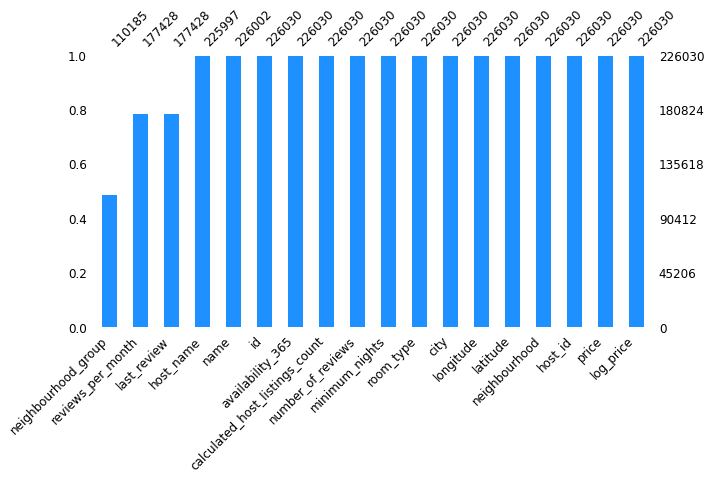

In [ ]:
msno.bar(airbnb_df, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

In [ ]:
# drop missing values
airbnb_df1 = airbnb_df.dropna()
airbnb_df1.shape

(85144, 18)

In [ ]:
# drop useless variables (mostly free text variables that will not help us in determining price)
drop_list = ['name', 'neighbourhood_group', 'host_id', 'host_name', 'last_review']
airbnb_df1.drop(airbnb_df1[drop_list], axis=1, inplace=True)
airbnb_df1.head(5)

id neighbourhood  latitude  longitude        room_type  price  \
48150  5065       Hamakua  20.04095 -155.43251  Entire home/apt     85   
48151  5269  South Kohala  20.02740 -155.70200  Entire home/apt    124   
48152  5387    South Kona  19.43119 -155.88079  Entire home/apt     85   
48153  5389    North Kona  19.56413 -155.96347  Entire home/apt    239   
48154  5390   Koloa-Poipu  21.88305 -159.47372  Entire home/apt     92   

       minimum_nights  number_of_reviews  reviews_per_month  \
48150               2                 42               0.45   
48151              30                 10               0.09   
48152               5                168               1.30   
48153               6                 20               0.24   
48154               3                143               1.03   

       calculated_host_listings_count  availability_365    city  log_price  
48150                               2               365  Hawaii   4.442651  
48151                               5               261  Hawaii   4.820282  
48152                               3               242  Hawaii   4.442651  
48153                               3               287  Hawaii   5.476464  
48154                               1               116  Hawaii   4.521789

In [ ]:
# drop observations with a price of 0 [QY]
airbnb_df1 = airbnb_df1[airbnb_df1['price'] != 0]
airbnb_df1.shape

(85138, 13)

In [ ]:
# check missing data again
missing1 = airbnb_df1.isna().sum()

missing1 /= airbnb_df1.shape[0]
missing1 *=100
missing1 = missing1.to_frame().rename(columns={0:'Precent Of Missing Values'})
missing1

Precent Of Missing Values
id                                                    0.0
neighbourhood                                         0.0
latitude                                              0.0
longitude                                             0.0
room_type                                             0.0
price                                                 0.0
minimum_nights                                        0.0
number_of_reviews                                     0.0
reviews_per_month                                     0.0
calculated_host_listings_count                        0.0
availability_365                                      0.0
city                                                  0.0
log_price                                             0.0

In [ ]:
airbnb_df1['neighbourhood'].value_counts()

Primary Urban Center     3198
Bedford-Stuyvesant       2719
Williamsburg             2681
Kihei-Makena             2648
Lahaina                  2335
                         ... 
East Compton                1
Desert View Highlands       1
East Whittier               1
Hawaiian Gardens            1
Huguenot                    1
Name: neighbourhood, Length: 630, dtype: int64

### Add new variables
  
I am trying to use the `latitude` and `longitude` variables to identify which county the listing is located in.   
  
==> The code runs without errors (if I try `for i in range(20)`, for instance, it works), but it takes too long to do all rows. It took more than 2 hours in my first go, so __I don't think adding the `county` variable is feasible__. 

In [ ]:
# ## Get the address and county from latitude/longitude 
# ## (takes a while to run -almost 60 min on my laptop lol)
# from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent="http")

# latitude_list = list(airbnb_df1['latitude'])
# longitude_list = list(airbnb_df1['longitude'])

# address_list, county_list = [], []

# for i in range(1000):
#   # Get each latitude and longitude 
#   latitude = str(latitude_list[i])
#   longitude = str(longitude_list[i])

#   # Get location 
#   location = geolocator.reverse(latitude + ',' + longitude)

#   # Save the address and county as new columns 
#   address_list.append(location.address)
#   county_list.append(location.raw['address']['county'])

# if len(address_list) == len(airbnb_df1) and len(county_list) == len(airbnb_df1):
#   airbnb_df1['address'] = address_list
#   airbnb_df1['county'] = county_list

KeyboardInterrupt: ignored

[AV] I am adding code below to check if the latitude and longiture are within the correct range and if they arent, put a nan.

In [ ]:
airbnb_df1.loc[(airbnb_df1['latitude'] < -90) | (airbnb_df1['latitude'] > 90), 'latitude'] = np.nan
airbnb_df1.loc[(airbnb_df1['longitude'] < -180) | (airbnb_df1['longitude'] > 180), 'longitude'] = np.nan

## __2. EDA__


### Basic statistics

In [ ]:
airbnb_df1.describe()

id      latitude     longitude         price  minimum_nights  \
count  8.513800e+04  85138.000000  85138.000000  85138.000000    85138.000000   
mean   2.244551e+07     35.385061   -106.237646    173.870446       10.070744   
std    1.273399e+07      8.090236     32.332444    297.233561       23.528610   
min    1.090000e+02     18.920990   -159.714900      9.000000        1.000000   
25%    1.229360e+07     33.978783   -122.306338     75.000000        2.000000   
50%    2.212988e+07     40.639270   -118.169585    118.000000        3.000000   
75%    3.345751e+07     40.746108    -73.955540    190.000000        7.000000   
max    4.530499e+07     47.734620    -71.123420  24999.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       85138.000000       85138.000000                    85138.000000   
mean           37.689363           1.157567                       12.176666   
std            61.553358           1.477891                       36.150012   
min             1.000000           0.010000                        1.000000   
25%             3.000000           0.170000                        1.000000   
50%            13.000000           0.570000                        1.000000   
75%            45.000000           1.630000                        4.000000   
max           840.000000          44.060000                      284.000000   

       availability_365     log_price  
count      85138.000000  85138.000000  
mean         157.993399      4.806901  
std          141.384612      0.751580  
min            0.000000      2.197225  
25%            0.000000      4.317488  
50%          142.000000      4.770685  
75%          309.000000      5.247024  
max          365.000000     10.126591

\### Density Plot

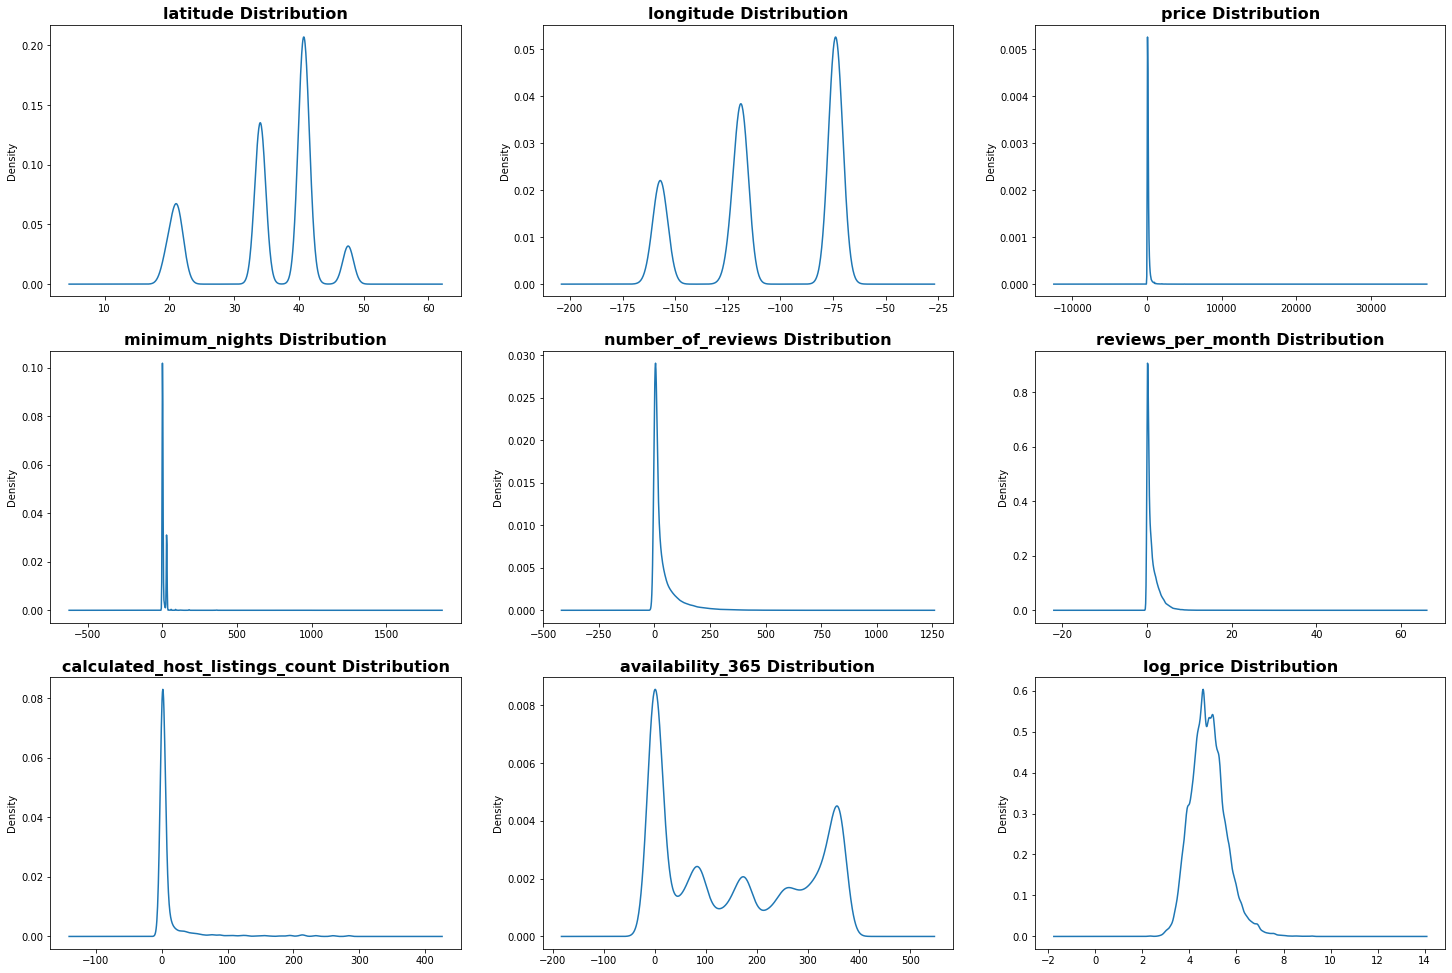

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3)
aux = 0
fig.set_figheight(17)
fig.set_figwidth(25)
for row in axes:
    for col in row:
        airbnb_df1[numeric_features[aux]].plot(kind='kde',ax=col)
        col.set_title(numeric_features[aux] +' Distribution',fontsize=16,fontweight='bold')
        aux+=1

In [ ]:
# Removing Outliers
lower_bound = .25
upper_bound = .75
iqr = airbnb_df1[airbnb_df1['price'].between(airbnb_df1['price'].quantile(lower_bound), airbnb_df1['price'].quantile(upper_bound), inclusive=True)]
iqr = iqr[iqr['number_of_reviews'] > 0]
iqr = iqr[iqr['calculated_host_listings_count'] < 10]
iqr = iqr[iqr['number_of_reviews'] < 200]
iqr = iqr[iqr['minimum_nights'] < 10]
iqr = iqr[iqr['reviews_per_month'] < 5]

In [ ]:
iqr = airbnb_df1[airbnb_df1['price'].between(airbnb_df1['price'].quantile(lower_bound), airbnb_df1['price'].quantile(upper_bound), inclusive=True)]
print(iqr)

              id      neighbourhood  latitude  longitude        room_type  \
48150       5065            Hamakua  20.04095 -155.43251  Entire home/apt   
48151       5269       South Kohala  20.02740 -155.70200  Entire home/apt   
48152       5387         South Kona  19.43119 -155.88079  Entire home/apt   
48154       5390        Koloa-Poipu  21.88305 -159.47372  Entire home/apt   
48155       5434  North Shore Kauai  22.21972 -159.46958  Entire home/apt   
...          ...                ...       ...        ...              ...   
212146  43461448      Rainier Beach  47.51301 -122.25115  Entire home/apt   
212152  43498717         Fauntleroy  47.52617 -122.38116  Entire home/apt   
212157  43531859          Roosevelt  47.68457 -122.31550  Entire home/apt   
212159  43554835      Olympic Hills  47.73462 -122.29509     Private room   
212160  43554849      Olympic Hills  47.73357 -122.29651  Entire home/apt   

        price  minimum_nights  number_of_reviews  reviews_per_month  \
4815

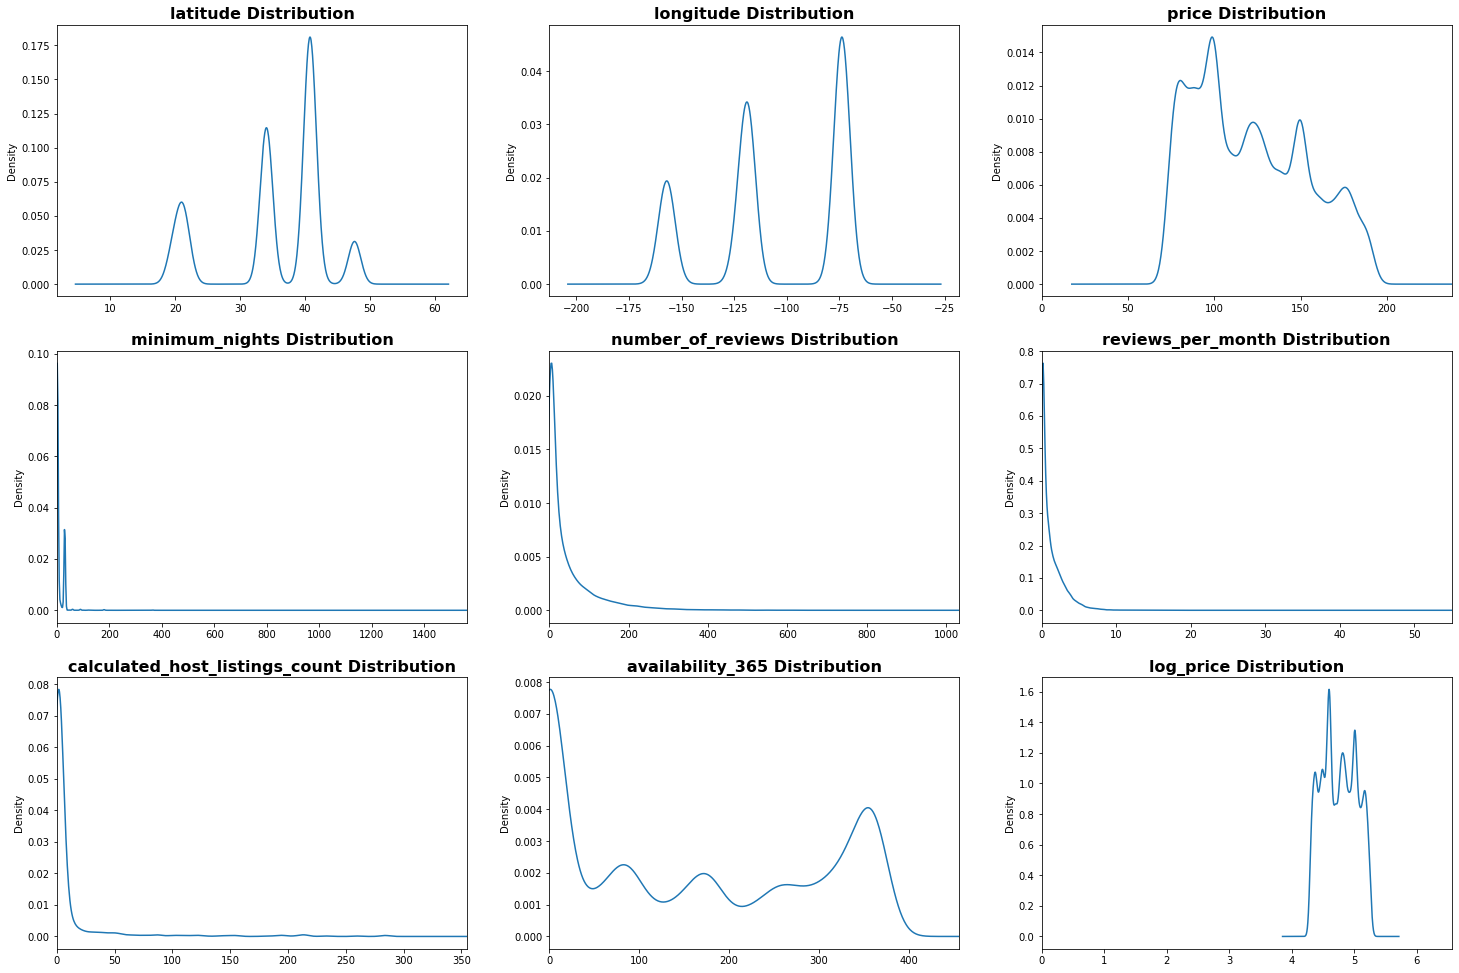

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3)
aux = 0
fig.set_figheight(17)
fig.set_figwidth(25)
for row in axes:
    for col in row:
        iqr[numeric_features[aux]].plot(kind='kde',ax=col)
        if numeric_features[aux] not in ['latitude','longitude']:
            col.set_xlim(0,iqr[numeric_features[aux]].max()+iqr[numeric_features[aux]].max()*0.25)
        col.set_title(numeric_features[aux] +' Distribution',fontsize=16,fontweight='bold')
        aux+=1

### Map Visualization

In [ ]:
# Thinking that it might be nice to see the locations of these properties on a map [QY]
coords = [33, -100] # lat, long
folium_map = folium.Map(location=coords, zoom_start=4, tiles="OpenStreetMap")
folium_map

# Prepare a map without outliers
folium_map_iqr = folium_map

In [ ]:
# without missing values
my_zip1 = zip(airbnb_df1['latitude'], airbnb_df1['longitude'], airbnb_df1['price'])
list_of_my_zip1 = list(my_zip1)

hm_layer1 = HeatMap(list_of_my_zip1,
                   min_opacity=0.1,
                   radius=6,
                   blur=4, 
                 )

folium_map.add_child(hm_layer1)
folium_map

In [ ]:
# without outliers
my_zip_iqr = zip(iqr['latitude'], iqr['longitude'], iqr['price'])
list_of_my_zip_iqr = list(my_zip_iqr)

hm_layer_iqr = HeatMap(list_of_my_zip_iqr,
                   min_opacity=0.1,
                   radius=6,
                   blur=4, 
                 )

folium_map_iqr.add_child(hm_layer_iqr)
folium_map_iqr

Note: We ended up with 5 cities (Rhode Island, NYC, Seattle, LA, and Hawaii). There 
are more ciities covered in the raw dataset. It seems that these cities were dropped because they have 'neighborhood group' missing. Let's see how useful the variable 'neighborhood group' is and decide what sample we want to use. [QY]  
  
  -> I think it's Rhode Island, not Boston? [YJ]
  -> Yes you are right! [QY]

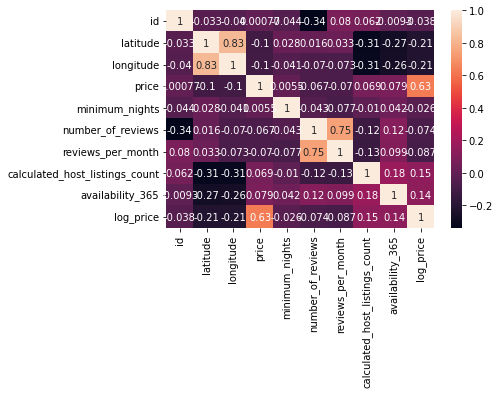

In [ ]:
#correlation [PS]
corr_map = airbnb_df1.corr()
sns.heatmap(corr_map,annot=True)

In [ ]:
# what is +ve correlated with price [AV]
pos_corr = corr_map['price'] > 0
corr_map['price'][pos_corr].sort_values(ascending = False).to_frame()

price
price                           1.000000
log_price                       0.630157
availability_365                0.078638
calculated_host_listings_count  0.068788
minimum_nights                  0.005506
id                              0.000765

### Boxplot

In [ ]:
# Box plot for one city [YJ]

# Subset 
## New York City 
df_ny = airbnb_df1[(airbnb_df1["city"] == "New York City")]

fig = px.box(df_ny, y = "price", 
             color = "neighborhood", 
             title = "AirBnB Price Distribution of NYC")
fig.show(renderer="colab")

In [ ]:
# what about log price? [QY]
## New York City 
df_ny = airbnb_df1[(airbnb_df1["city"] == "New York City")]

fig = px.box(df_ny, y = "log_price", 
             color = "room_type", 
             title = "AirBnB Price Distribution of NYC")
fig.show(renderer="colab")

--> At least for data visualization, log(price) seems better! [YJ]

## __3. Modeling__
* XGBoost 
* Random Forest 
* (Adaboost,
Decision Tree,
GBM,
Adaboost,
Logistic Regression)

In [ ]:
airbnb_df1

id    neighbourhood  latitude  longitude        room_type  \
48150       5065          Hamakua  20.04095 -155.43251  Entire home/apt   
48151       5269     South Kohala  20.02740 -155.70200  Entire home/apt   
48152       5387       South Kona  19.43119 -155.88079  Entire home/apt   
48153       5389       North Kona  19.56413 -155.96347  Entire home/apt   
48154       5390      Koloa-Poipu  21.88305 -159.47372  Entire home/apt   
...          ...              ...       ...        ...              ...   
212157  43531859        Roosevelt  47.68457 -122.31550  Entire home/apt   
212159  43554835    Olympic Hills  47.73462 -122.29509     Private room   
212160  43554849    Olympic Hills  47.73357 -122.29651  Entire home/apt   
212161  43589616    Highland Park  47.51284 -122.33587  Entire home/apt   
212164  43603849  East Queen Anne  47.63913 -122.34293     Private room   

        price  minimum_nights  number_of_reviews  reviews_per_month  \
48150      85               2                 42               0.45   
48151     124              30                 10               0.09   
48152      85               5                168               1.30   
48153     239               6                 20               0.24   
48154      92               3                143               1.03   
...       ...             ...                ...                ...   
212157    100               3                  1               1.00   
212159     79               1                  2               2.00   
212160     79               1                  1               1.00   
212161    200               1                  2               2.00   
212164     35               1                  2               2.00   

        calculated_host_listings_count  availability_365     city  log_price  
48150                                2               365   Hawaii   4.442651  
48151                                5               261   Hawaii   4.820282  
48152                                3               242   Hawaii   4.442651  
48153                                3               287   Hawaii   5.476464  
48154                                1               116   Hawaii   4.521789  
...                                ...               ...      ...        ...  
212157                               1                99  Seattle   4.605170  
212159                               3               337  Seattle   4.369448  
212160                               3               351  Seattle   4.369448  
212161                               1               330  Seattle   5.298317  
212164                               2                 0  Seattle   3.555348  

[85138 rows x 13 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e46233350>,
      dtype=object)

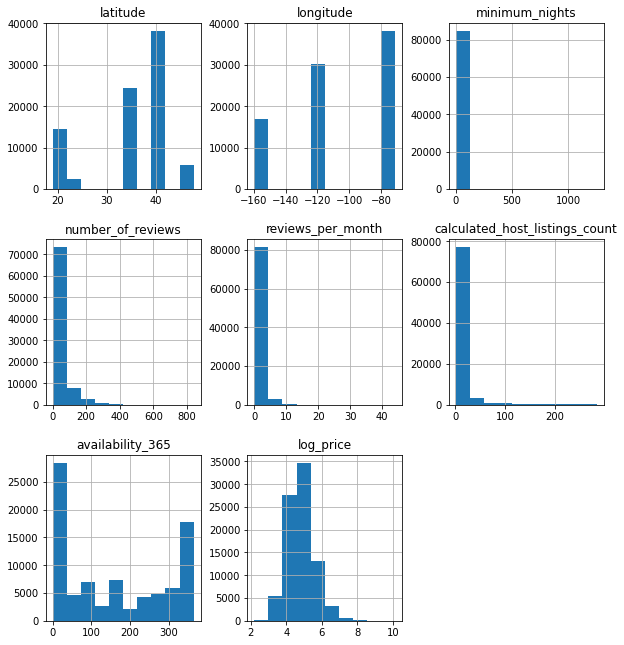

In [ ]:

# we should probably standardise the data before using it in the models?
from sklearn.preprocessing import StandardScaler

numeric_columns = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'log_price']
airbnb_df2 = airbnb_df1[numeric_columns]

In [ ]:
transformed_df = pd.get_dummies(airbnb_df1)
transformed_df.head()

id  latitude  longitude  price  minimum_nights  number_of_reviews  \
48150  5065  20.04095 -155.43251     85               2                 42   
48151  5269  20.02740 -155.70200    124              30                 10   
48152  5387  19.43119 -155.88079     85               5                168   
48153  5389  19.56413 -155.96347    239               6                 20   
48154  5390  21.88305 -159.47372     92               3                143   

       reviews_per_month  calculated_host_listings_count  availability_365  \
48150               0.45                               2               365   
48151               0.09                               5               261   
48152               1.30                               3               242   
48153               0.24                               3               287   
48154               1.03                               1               116   

       log_price  ...  neighbourhood_Yesler Terrace  \
48150   4.442651  ...                             0   
48151   4.820282  ...                             0   
48152   4.442651  ...                             0   
48153   5.476464  ...                             0   
48154   4.521789  ...                             0   

       room_type_Entire home/apt  room_type_Hotel room  \
48150                          1                     0   
48151                          1                     0   
48152                          1                     0   
48153                          1                     0   
48154                          1                     0   

       room_type_Private room  room_type_Shared room  city_Hawaii  \
48150                       0                      0            1   
48151                       0                      0            1   
48152                       0                      0            1   
48153                       0                      0            1   
48154                       0                      0            1   

       city_Los Angeles  city_New York City  city_Rhode Island  city_Seattle  
48150                 0                   0                  0             0  
48151                 0                   0                  0             0  
48152                 0                   0                  0             0  
48153                 0                   0                  0             0  
48154                 0                   0                  0             0  

[5 rows x 649 columns]

In [ ]:
# Separating X and y
X = airbnb_df2.drop("log_price", axis=1) # drop target variable
y = airbnb_df2["log_price"] # target variable

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e468c8c90>,
      dtype=object)

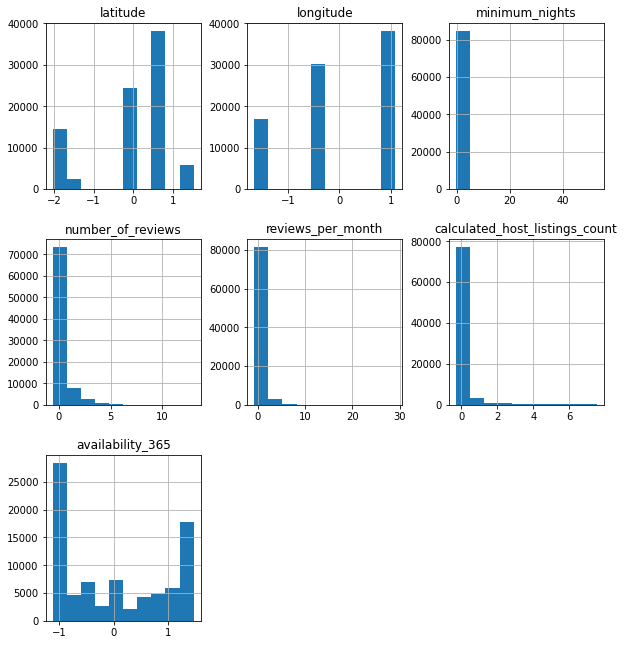

In [ ]:
X.hist(figsize=(10,11))

### Logistic Regression

In [ ]:
# AV
# import packages 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# split data set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)

# do logistic regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

In [ ]:
airbnb_df1

id    neighbourhood  latitude  longitude        room_type  \
48150       5065          Hamakua  20.04095 -155.43251  Entire home/apt   
48151       5269     South Kohala  20.02740 -155.70200  Entire home/apt   
48152       5387       South Kona  19.43119 -155.88079  Entire home/apt   
48153       5389       North Kona  19.56413 -155.96347  Entire home/apt   
48154       5390      Koloa-Poipu  21.88305 -159.47372  Entire home/apt   
...          ...              ...       ...        ...              ...   
212157  43531859        Roosevelt  47.68457 -122.31550  Entire home/apt   
212159  43554835    Olympic Hills  47.73462 -122.29509     Private room   
212160  43554849    Olympic Hills  47.73357 -122.29651  Entire home/apt   
212161  43589616    Highland Park  47.51284 -122.33587  Entire home/apt   
212164  43603849  East Queen Anne  47.63913 -122.34293     Private room   

        price  minimum_nights  number_of_reviews  reviews_per_month  \
48150      85               2                 42               0.45   
48151     124              30                 10               0.09   
48152      85               5                168               1.30   
48153     239               6                 20               0.24   
48154      92               3                143               1.03   
...       ...             ...                ...                ...   
212157    100               3                  1               1.00   
212159     79               1                  2               2.00   
212160     79               1                  1               1.00   
212161    200               1                  2               2.00   
212164     35               1                  2               2.00   

        calculated_host_listings_count  availability_365     city  log_price  
48150                                2               365   Hawaii   4.442651  
48151                                5               261   Hawaii   4.820282  
48152                                3               242   Hawaii   4.442651  
48153                                3               287   Hawaii   5.476464  
48154                                1               116   Hawaii   4.521789  
...                                ...               ...      ...        ...  
212157                               1                99  Seattle   4.605170  
212159                               3               337  Seattle   4.369448  
212160                               3               351  Seattle   4.369448  
212161                               1               330  Seattle   5.298317  
212164                               2                 0  Seattle   3.555348  

[85138 rows x 13 columns]

#### Cross-validation 
  [YJ]

In [ ]:
airbnb_df1.head(2)

id neighbourhood  latitude  longitude        room_type  price  \
48150  5065       Hamakua  20.04095 -155.43251  Entire home/apt     85   
48151  5269  South Kohala  20.02740 -155.70200  Entire home/apt    124   

       minimum_nights  number_of_reviews  reviews_per_month  \
48150               2                 42               0.45   
48151              30                 10               0.09   

       calculated_host_listings_count  availability_365    city  log_price  
48150                               2               365  Hawaii   4.442651  
48151                               5               261  Hawaii   4.820282

In [ ]:
 # Change dataset with dummy variables 
airbnb_df_dum = pd.get_dummies(data = airbnb_df1[['neighbourhood', 'latitude', 'longitude', 
                                                 'room_type', 'price', 'minimum_nights', 
                                                 'number_of_reviews', 'reviews_per_month', 
                                                  'calculated_host_listings_count', 
                                                 'availability_365', 'city', 'log_price']])
airbnb_df_dum.head()

latitude  longitude  price  minimum_nights  number_of_reviews  \
48150  20.04095 -155.43251     85               2                 42   
48151  20.02740 -155.70200    124              30                 10   
48152  19.43119 -155.88079     85               5                168   
48153  19.56413 -155.96347    239               6                 20   
48154  21.88305 -159.47372     92               3                143   

       reviews_per_month  calculated_host_listings_count  availability_365  \
48150               0.45                               2               365   
48151               0.09                               5               261   
48152               1.30                               3               242   
48153               0.24                               3               287   
48154               1.03                               1               116   

       log_price  neighbourhood_Acton  ...  neighbourhood_Yesler Terrace  \
48150   4.442651                    0  ...                             0   
48151   4.820282                    0  ...                             0   
48152   4.442651                    0  ...                             0   
48153   5.476464                    0  ...                             0   
48154   4.521789                    0  ...                             0   

       room_type_Entire home/apt  room_type_Hotel room  \
48150                          1                     0   
48151                          1                     0   
48152                          1                     0   
48153                          1                     0   
48154                          1                     0   

       room_type_Private room  room_type_Shared room  city_Hawaii  \
48150                       0                      0            1   
48151                       0                      0            1   
48152                       0                      0            1   
48153                       0                      0            1   
48154                       0                      0            1   

       city_Los Angeles  city_New York City  city_Rhode Island  city_Seattle  
48150                 0                   0                  0             0  
48151                 0                   0                  0             0  
48152                 0                   0                  0             0  
48153                 0                   0                  0             0  
48154                 0                   0                  0             0  

[5 rows x 648 columns]

In [ ]:
y_target = np.asarray(airbnb_df_dum['price'])
X_data = airbnb_df_dum.drop(['price', 'log_price'], axis = 1, inplace = False)

In [ ]:
# Random Forest Regressor using cross-validation 
# (This code chunk took about 30 min in my local computer)
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

y_target = np.asarray(airbnb_df_dum['price'])
X_data = airbnb_df_dum.drop(['price', 'log_price'], axis = 1, inplace = False)
  
rf = RandomForestRegressor()
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('RMSE scores for 5 CVs:', np.round(rmse_scores, 2))
print('Average RMSE:', avg_rmse)

[13:16:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:18:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: ignored

The above code chunk gives the following:  
```RMSE scores for 5 CVs: [500.16 328.2  260.62 272.46 263.37]```  
```Average RMSE: 324.9607083990866``` 

### XGBoost

In [ ]:
# AV
# XGBoost using cross-validation 
from sklearn.model_selection import cross_val_score
import xgboost as xgb

y_target = np.asarray(airbnb_df_dum['price'])
X_data = airbnb_df_dum.drop(['price', 'log_price'], axis = 1, inplace = False)
  
xgb_reg = xgb.XGBRegressor()
neg_mse_scores = cross_val_score(xgb_reg, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('RMSE scores for 5 CVs:', np.round(rmse_scores, 2))
print('Average RMSE:', avg_rmse)

[13:20:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:22:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:23:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Decision Tree
  
[YJ]

In [ ]:
from sklearn.tree import DecisionTreeRegressor 

tree_reg = DecisionTreeRegressor(max_depth = 2)
tree_reg.fit(X_train, y_train)

### Light GBM

In [ ]:
# Light GBM using cross-validation 
# (This code chunk took less than 1 min in my local computer)
from lightgbm import LGBMRegressor

y_target = np.asarray(airbnb_df_dum['price'])
X_data = airbnb_df_dum.drop(['price', 'log_price'], axis = 1, inplace = False)

lgb_reg = LGBMRegressor(n_estimators = 1000)
neg_mse_scores = cross_val_score(lgb_reg, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-neg_mse_scores )
avg_rmse = np.mean(rmse_scores)

print('RMSE scores for 5 CVs:', np.round(rmse_scores, 2))
print('Average RMSE:', avg_rmse)

RMSE scores for 5 CVs: [960.81 271.   249.66 270.04 236.76]
Average RMSE: 397.653506910711


## __4. Model Selection__

In [ ]:
from sklearn.metrics import confusion_matrix, explained_variance_score, mean_squared_error, r2_score


-> As far as I know, confusion matrix is used to evaluate classification models, not regression. I think we can use MSE [YJ]

## __5. Conclusion__